In [157]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# %matplotlib inline

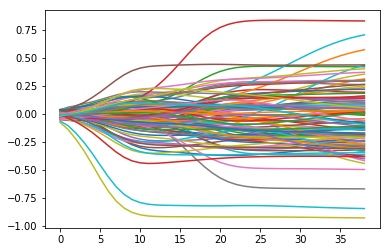

In [169]:
traj0 = np.loadtxt(open("rnndata/no_inputs.csv", "rb"), delimiter=",", skiprows=1).T

for traj in traj0:
    plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

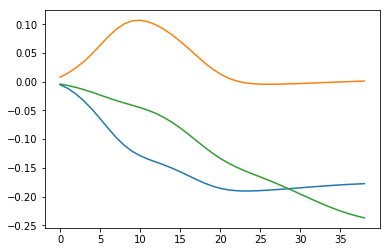

In [170]:
U,S_vec,VT = np.linalg.svd(traj0.T)
modes = 3
S = np.zeros_like(U)
S = np.zeros([U.shape[0],VT.shape[0]])
for i in range(modes):
    S[i,i] = S_vec[i]

traj_projected = U@S@VT[:,:3]

for traj in traj_projected.T:
    plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

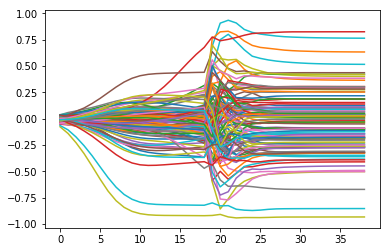

In [158]:
traj0 = np.loadtxt(open("rnndata/0perturb.csv", "rb"), delimiter=",", skiprows=1).T

for traj in traj0:
    plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

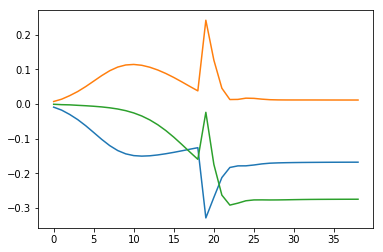

In [159]:
traj0 = np.loadtxt(open("rnndata/0perturb.csv", "rb"), delimiter=",", skiprows=1).T
U,S_vec,VT = np.linalg.svd(traj0.T)
modes = 3
S = np.zeros_like(U)
S = np.zeros([U.shape[0],VT.shape[0]])
for i in range(modes):
    S[i,i] = S_vec[i]

traj_projected = U@S@VT[:,:3]

for traj in traj_projected.T:
    plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

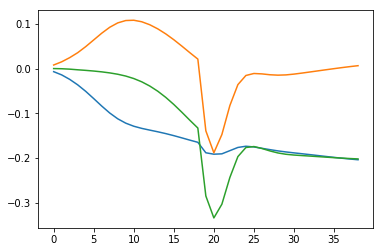

In [160]:
traj1 = np.loadtxt(open("rnndata/1perturb.csv", "rb"), delimiter=",", skiprows=1).T
U,S_vec,VT = np.linalg.svd(traj1.T)
modes = 3
S = np.zeros_like(U)
S = np.zeros([U.shape[0],VT.shape[0]])
for i in range(modes):
    S[i,i] = S_vec[i]

traj_projected = U@S@VT[:,:3]

for traj in traj_projected.T:
    plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

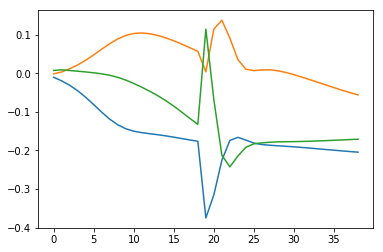

In [161]:
traj2 = np.loadtxt(open("rnndata/2perturb.csv", "rb"), delimiter=",", skiprows=1).T
U,S_vec,VT = np.linalg.svd(traj2.T)
modes = 3
S = np.zeros_like(U)
S = np.zeros([U.shape[0],VT.shape[0]])
for i in range(modes):
    S[i,i] = S_vec[i]

traj_projected = U@S@VT[:,:3]

for traj in traj_projected.T:
    plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

traj_projected shape should be length of the n data sets combined x n projection modes: 
 (117, 3)


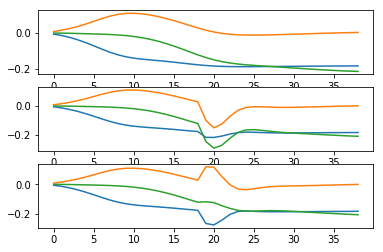

In [173]:
datasets = [traj0.T,traj1.T,traj2.T]
n_dsets = len(datasets)
traj_c = np.concatenate(datasets).T
U,S_vec,VT = np.linalg.svd(traj_c.T)
S = np.zeros_like(U)
S = np.zeros([U.shape[0],VT.shape[0]])
for i in range(modes):
    S[i,i] = S_vec[i]

traj_projected = U@S@VT[:,:modes]
print("traj_projected shape should be length of the n data sets combined x n projection modes: \n",
traj_projected.shape)

plt.figure(1)

traj_projected_split = np.split(traj_projected,n_dsets)
for i in range(len(traj_projected_split)):
    plt.subplot(311+i)
    for traj in traj_projected_split[i].T:
        plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

In [163]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [164]:
t = np.arange(traj_projected_split[0].shape[0])
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

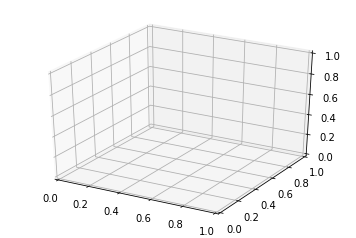

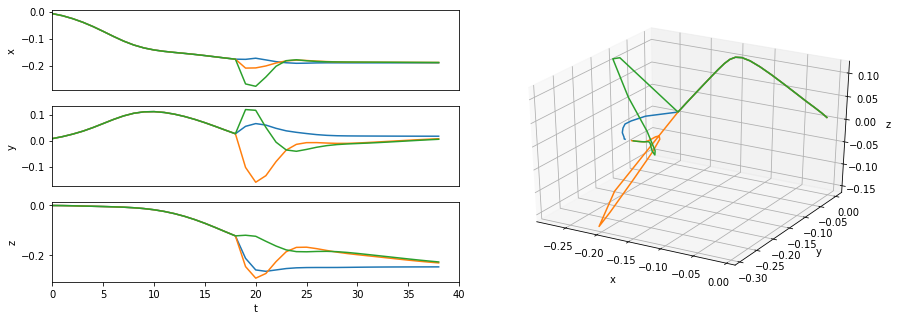

In [165]:
# --> Plot time traces of the two trajectories as well as the corresponding strange attractor.
w = 10
fig = plt.figure(figsize=(1.5*w, w/2))
gs = GridSpec(3, 6)

ax0 = fig.add_subplot(gs[0, :3])
for i in range(len(traj_projected_split)):  
    ax0.plot(t, traj_projected_split[i][:,0])
# ax0.plot(t, y[:, 0])
ax0.set_ylabel('x')
ax0.set_xticks([])
ax0.set_xlim(0, 40)

ax1 = fig.add_subplot(gs[1, :3])
for i in range(len(traj_projected_split)):  
    ax1.plot(t, traj_projected_split[i][:,1])
# ax1.plot(t, y[:, 1])
ax1.set_ylabel('y')
ax1.set_xticks([])
ax1.set_xlim(0, 40)

ax2 = fig.add_subplot(gs[2, :3])
for i in range(len(traj_projected_split)):  
    ax2.plot(t, traj_projected_split[i][:,2])
# ax2.plot(t, y[:, 2])
ax2.set_ylabel('z')
ax2.set_xlabel('t')
ax2.set_xlim(0, 40)

ax3 = fig.add_subplot(gs[:, 3:], projection='3d')
for i in range(len(traj_projected_split)):    
    ax3.plot(traj_projected_split[i][:,0], traj_projected_split[i][:,1], traj_projected_split[i][:,2],zdir='y')

# ax3.plot(y[:, 0], y[:, 1], y[:, 2])
ax3.set_xlabel('x', labelpad=10)
ax3.set_ylabel('y')
ax3.set_zlabel('z')
plt.show()

In [172]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import random

r = lambda: random.randint(0,255)

data = []

for i in range(len(traj_projected_split)):
    traj = traj_projected_split[i]
    
    color = '#%02X%02X%02X' % (r(),r(),r())
    x = pd.Series(traj[:,0])
    y = pd.Series(traj[:,1])
    z = pd.Series(traj[:,2])

    trace = go.Scatter3d(x=x, y=y, z=z,
        marker=dict(
            size=4,
            color=color,
            colorscale='Viridis',
        ),
        line=dict(
            color=color,
            width=1
        )
    )
    data.append(trace)

layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='3 bit flip flop',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='pandas-brownian-motion-3d', height=700, validate=False)

In [168]:
traj_projected_split[0],traj_projected_split[1],traj_projected_split[2]

(array([[-0.00682557,  0.00809821, -0.00114908],
        [-0.01465634,  0.01570824, -0.00151533],
        [-0.02557632,  0.02529274, -0.00224963],
        [-0.03899363,  0.03666288, -0.00341481],
        [-0.05496528,  0.05056085, -0.00432465],
        [-0.07289811,  0.06599437, -0.00531107],
        [-0.09144365,  0.08148509, -0.00644861],
        [-0.10883082,  0.09518151, -0.00796717],
        [-0.12337632,  0.10530135, -0.01015427],
        [-0.13431284,  0.11081316, -0.0134438 ],
        [-0.14190622,  0.11163789, -0.01826669],
        [-0.1471083 ,  0.10838948, -0.02494455],
        [-0.15105238,  0.10190218, -0.03367508],
        [-0.15466895,  0.09288798, -0.04455173],
        [-0.15850725,  0.08183839, -0.05754845],
        [-0.16274793,  0.06912868, -0.07246588],
        [-0.1672927 ,  0.05520705, -0.08884981],
        [-0.17186625,  0.04074815, -0.10594065],
        [-0.1761166 ,  0.02667061, -0.1227337 ],
        [-0.17676067,  0.05513409, -0.21271161],
        [-0.17254722